Group: 06 (Tom Paßberg, Iain Dorsch, Jonas Krug, Jonathan Schulz)

# Homework 3

This homework is designed to help you get more comfortable with two- and three-dimensional linear transformations through visualization. Furthermore, we will consider the Cholesky decomposition for symmetric positive definite linear systems.
Let's get initialization out of the way, and then proceed.

In [127]:
import numpy as np
import scipy.linalg

import matplotlib.pyplot as plt         # plotting
import matplotlib.collections as clt    # plotting
from mpl_toolkits.mplot3d import Axes3D # 3D plotting

%matplotlib inline

from IPython.core.display import HTML
HTML("""<style>.output_png { display: table-cell; text-align: center; vertical-align: middle; }</style>""");

- - -

<div class="alert alert-info">

### Visualizing Transforms
</div>

A simple way to visualize linear transforms over two-dimensional or three-dimensional spaces is to consider their effect on a known geometry, e.g. a square, cube, circle, or sphere. Furthermore, depicting the images of basis vectors can also be helpful.

<div class="alert alert-success">

**Task 1:** Modify the function `visualize_transform_2d` below such that it draws the transformed rectangle and basis vectors corresponding to the matrix argument `M`.
</div>

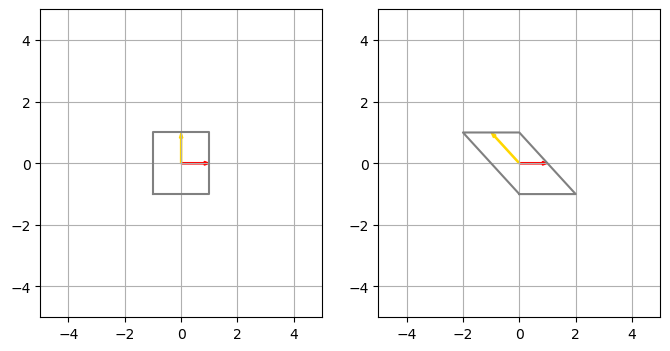

In [128]:
def visualize_transform_2d( ax, M ):
    lines = np.array([[-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1]])
    basis = np.array([[1, 0], [0, 1]])
    
    lines = M @ lines
    basis = M @ basis 
    
    ax.plot( lines[0,:], lines[1,:], '-', color="gray" )
    ax.arrow( 0, 0, basis[0][0], basis[1][0], color='red', width=.04, length_includes_head=True )
    ax.arrow( 0, 0, basis[0][1], basis[1][1], color='gold', width=.04, length_includes_head=True )

    ax.set_xlim( -5, 5 )
    ax.set_ylim( -5, 5 )
    ax.grid()
    
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,4))

# visualize untransformed geometry
I = np.identity(2)   
visualize_transform_2d( ax0, I )

# visualize transformed geometry
M = np.array([[1, -1], [0, 1]])
visualize_transform_2d( ax1, M )

<div class="alert alert-success">
    
**Task 2**: Visualize the following types of transforms using the above method:
1. A reflection on the $x$-axis (mirroring with respect to $y$ axis).
2. A *shear transform*, which is given by matrices of the form $S_a := \begin{pmatrix} 1 & a \\ 0 & 1 \end{pmatrix}$ for $a > 0$.
3. A clockwise rotation around the origin with angle $\alpha = 45^\circ$.
</div>

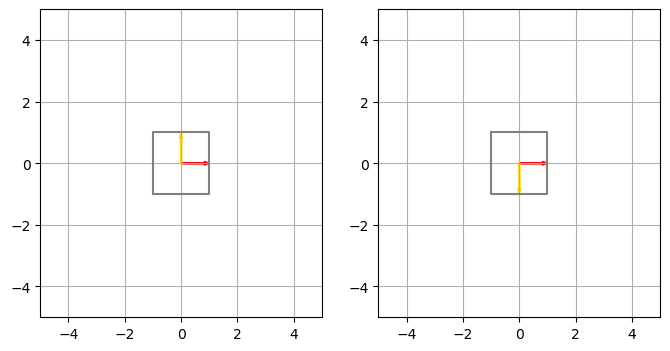

In [129]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,4))

# visualize untransformed geometry
I = np.identity(2)   
visualize_transform_2d( ax0, I )

# visualize transformed geometry
M = np.array([[1, 0], [0, -1]])
visualize_transform_2d( ax1, M )

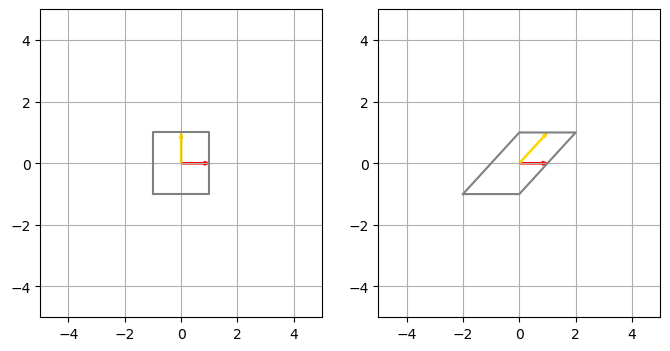

In [130]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,4))

# visualize untransformed geometry
I = np.identity(2)   
visualize_transform_2d( ax0, I )

# visualize transformed geometry
alpha = 1
M = np.array([[1, alpha], [0, 1]])
visualize_transform_2d( ax1, M )

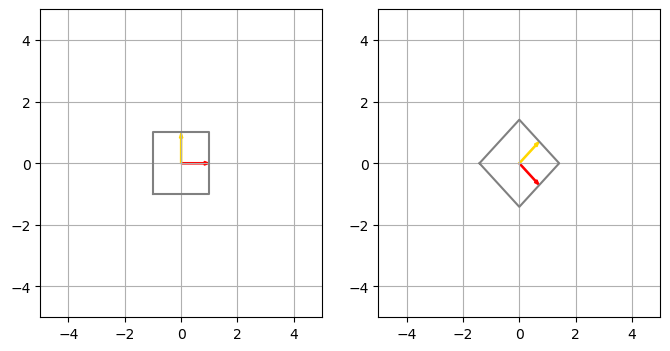

In [131]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,4))

# visualize untransformed geometry
I = np.identity(2)   
visualize_transform_2d( ax0, I )

# visualize transformed geometry
alpha = - np.pi / 4
M = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
visualize_transform_2d( ax1, M )

<div class="alert alert-success">

**Task 3**: Use `visualize_transform_2d` to illustrate that matrix multiplication is -- in general -- not commutative, i.e. 

$$A\cdot B \neq B\cdot A.$$ 
for two $2\times 2$-matrices $A$, $B$. To show this, find two matrices $A$ and $B$ that do not commute, and visualize the respective transforms. You can choose $A$ and $B$ from the transforms in the previous task.
<div>

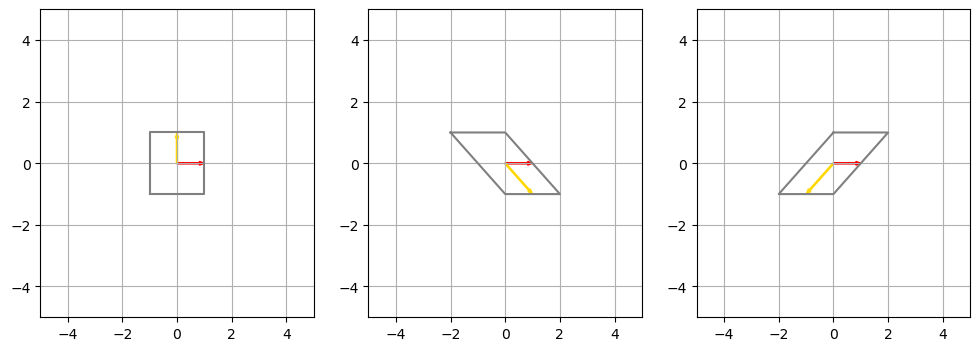

In [132]:
#TODO: show that A*B != B*A by using "visualize_transform_2d"

A = np.array([[1, 0], [0, -1]])
B = np.array([[1, 1], [0, 1]])

M_1 = A @ B
M_2 = B @ A

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,4))

# visualize untransformed geometry
I = np.identity(2)   
visualize_transform_2d( ax0, I )
# visualize A @ B
visualize_transform_2d( ax1, M_1 )
# visualize B @ A
visualize_transform_2d( ax2, M_2 )

- - -

Visualizing 3D transforms is more challenging, but can be done in the same way in principle by drawing transformed 3D geometry. Here, we'll use a sphere instead of a rectangle. The sphere points are generated using [polar coordinates](https://en.wikipedia.org/wiki/Spherical_coordinate_system) and drawn using matplotlib's [`surface`](https://matplotlib.org/3.1.1/gallery/mplot3d/surface3d.html) function.

Unfortunately, matplotlib does not have nice three-dimensional arrows, so let's stick to lines. To be able to see the basis vector inside the surface, we set the latters to be 90% transparent (the `alpha` parameter indicates opacity, i.e. the surface should be 10% opaque). 

<div class="alert alert-success">

**Task 4:** Modify the function `visualize_transform_3d` below such that it draws the transformed rectangle and basis vectors corresponding to the matrix argument `M`.
</div>

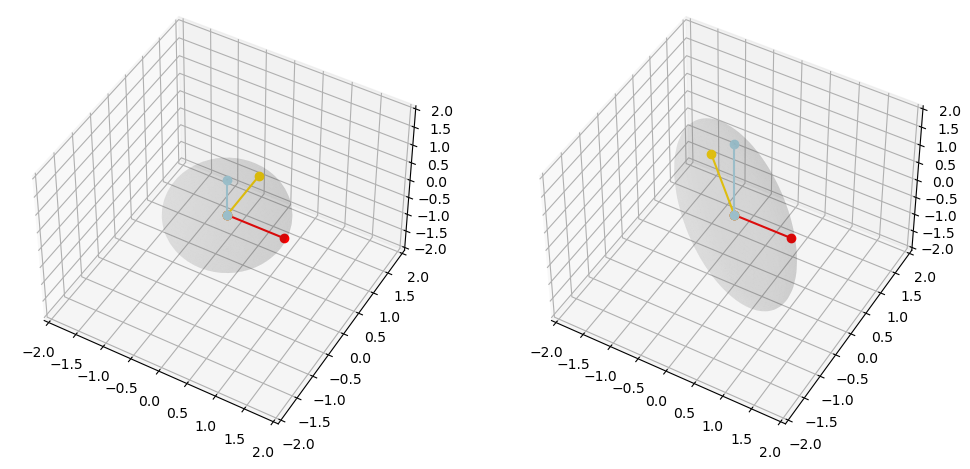

In [133]:
def visualize_transform_3d( ax, M ):
    """Visualize the effect of the linear transform described by M on the plot axes ax."""

    # create sphere grid
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    surf = np.stack([np.cos(u)*np.sin(v),np.sin(u)*np.sin(v),np.cos(v)], axis=0).reshape(3,2500)
    
    # create basis vectors for arrows
    basis = np.identity(3)
    
    # TODO transform surf and basis using M
    surf = M @ surf
    basis = M @ basis
    
    ax.plot_surface( *(surf.reshape(3,50,50)), color="gray", alpha=0.1 )

    for i, c in zip([0, 1, 2], ['red', 'gold', 'lightblue']):
        ax.plot( [0, basis[0][i]], [0, basis[1][i]], [0, basis[2][i]], '-o', color=c )

    ax.set_xlim( -2, 2 )
    ax.set_ylim( -2, 2 )
    ax.set_zlim( -2, 2 )
    
    
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6), subplot_kw={'projection': '3d', 'elev': 45})

# visualize untransformed geometry
I = np.identity(3)   
visualize_transform_3d( ax0, I )

# visualize transformed geometry
M = np.array([[1, -1, 0], [0, 1, 0], [0, 0, 2]])
visualize_transform_3d( ax1, M )

Again, it is not too difficult to construct the matrix representation of particular transforms.

<div class="alert alert-success">

**Task 5:** Construct and visualize the following kinds of 3D linear transformations as matrices:

1. A reflection about the origin of the $xy$-plane (leaving the $z$-coordinate unchanged).
2. A rotation of angle $\alpha$ around the $x$-axis (i.e. $x$-coordinates remain unchanged).

Note: For both, consider a $2\times 2$ matrix of the same type for the relevant plane and then fill in an identity column for the unchanged coordinate.
</div>

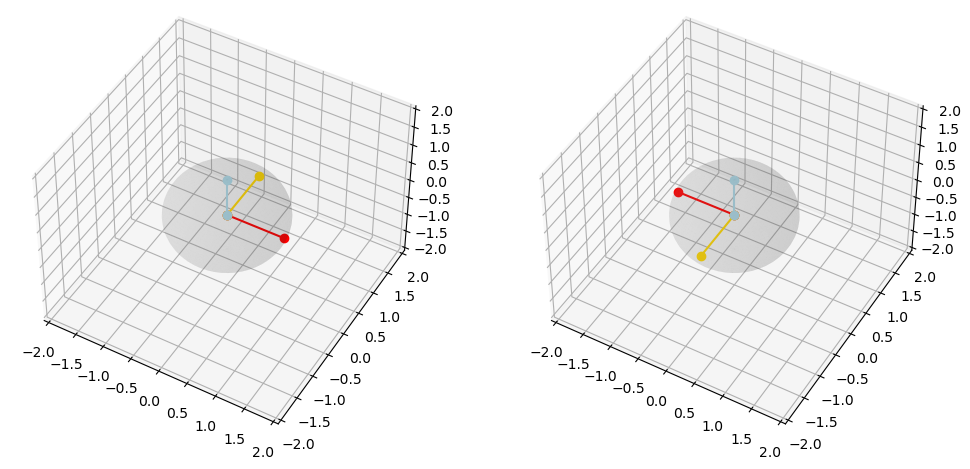

In [134]:
# TODO reflection
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6), subplot_kw={'projection': '3d', 'elev': 45})

# visualize untransformed geometry
I = np.identity(3)   
visualize_transform_3d( ax0, I )

# visualize transformed geometry
M = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
visualize_transform_3d( ax1, M )

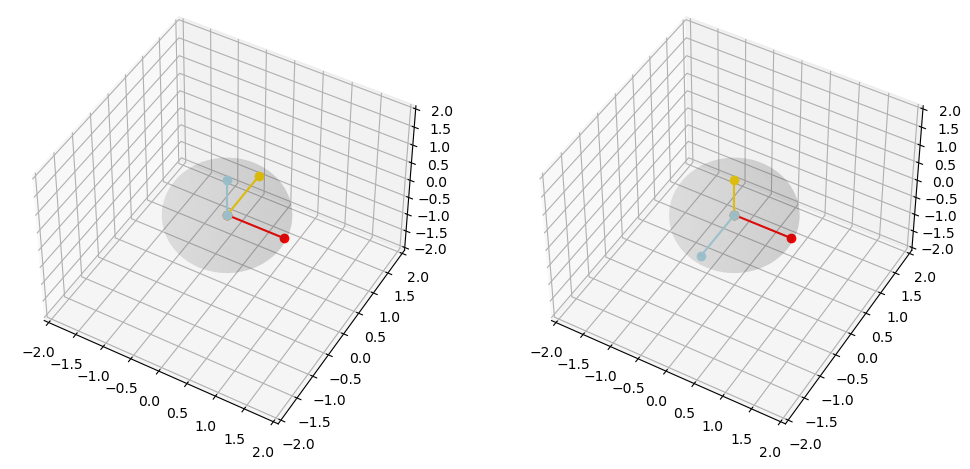

In [135]:
# TODO reflection
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6), subplot_kw={'projection': '3d', 'elev': 45})

# visualize untransformed geometry
I = np.identity(3)   
visualize_transform_3d( ax0, I )

# visualize transformed geometry
alpha = - np.pi / 2
M = np.array([[1, 0, 0], [0,np.cos(alpha), np.sin(alpha)], [0, -np.sin(alpha), np.cos(alpha)]])
visualize_transform_3d( ax1, M )

- - -

<div class="alert alert-info">

### Cholesky Decomposition
</div>

As discussed in the course, a linear system with a symmetric positive definite system matrix $A\in\mathbb{R}^{n\times n}$ can be solved using the Cholesky decomposition, which we will try out in the following.

First, let's define a function to give us a random $n\times n$ system matrix $A$ and RHS $b$.

In [136]:
def random_spd_linear_system( n ):

    # generate a random RHS
    b = 2.0 * np.random.rand(n, 1) - 1.0

    # generate a random matrix and RHS
    M = 2.0 * np.random.rand(n, n) - 1.0
    A = np.matmul(M,np.transpose(M))
    return A, b
    
A, b = random_spd_linear_system( 50 )

To solve the linear system $A x = b$, we can first perform *Cholesky decomposition* $A= L L^T$, where $L$ is lower triangular, giving two triangular systems

$$ L y = b \qquad\text{and}\qquad L^T x = y ,$$ 

whose solution $x$ is the solution of $Ax = b$.

<div class="alert alert-success">
    
**Task 6:** Complete the function `solve_linear_sytem_cholesky` below to return the solution of $Ax = b$.

Steps:
1. Compute Cholesky decomposition of $A = L L^T$
2. Solve $Ly = b$ using forward substitution.
3. Solve $L^Tx = y$ using backward substitution.
4. Return $x$ as the solution.

Hint: You may use `fwd_subs` and `bwd_subs` from the second Homework. You can check the correctness of your implementation by evaluating the residual vector $r = b-Ax$. 
</div>

In [137]:
def fwd_subs(L, b):
    y = np.zeros_like(b)
    for i,l in enumerate(L):
        y[i] = (b[i] - l @ y ) / l[i]
    return y

In [138]:
def bwd_subs(L, y):
    x = np.zeros_like(y)
    for i in range(len(L)-1, -1, -1):
        x[i] = (y[i] - L[i] @ x) / L[i][i]
    return x

In [139]:
def cholesky_decomposition(A):
    L = np.zeros_like(A)
    for i,a in enumerate(A):
        for j in range(i+1):
            if i == j:
                L[i][j] = np.sqrt(a[i] - L[i] @ L[j])
            else:
                L[i][j] = (1.0 / L[j][j] * (a[j] - L[i] @ L[j]))
    return L

In [140]:
def solve_linear_system_cholesky(A, b):
    L = cholesky_decomposition(A)
    y = fwd_subs(L, b)
    x = bwd_subs(L.T, y)
    return x
    
x = solve_linear_system_cholesky( A, b )

residual = b-np.matmul(A,x)
print(residual)

[[ 3.06643599e-13]
 [ 3.03979064e-13]
 [ 3.16857651e-13]
 [-4.50750548e-14]
 [-1.55431223e-14]
 [ 3.35065309e-13]
 [ 6.92779167e-14]
 [-4.08340028e-13]
 [ 2.97539771e-14]
 [-3.84137167e-13]
 [ 6.81676937e-14]
 [-1.64090963e-13]
 [-1.92290628e-13]
 [-3.28626015e-13]
 [-1.85185201e-13]
 [-5.57554003e-13]
 [ 1.52988733e-13]
 [ 7.57172103e-14]
 [-2.36033415e-13]
 [ 2.97539771e-14]
 [-5.71542813e-13]
 [ 4.59854377e-13]
 [-5.93525229e-13]
 [ 2.11830553e-13]
 [ 1.77635684e-14]
 [-2.95319325e-13]
 [-7.01660952e-14]
 [ 2.74891221e-13]
 [-1.62758695e-13]
 [-9.76996262e-14]
 [-2.20046203e-13]
 [-3.17523785e-13]
 [-2.11164419e-13]
 [-1.94955163e-13]
 [-6.94999613e-14]
 [ 3.23074900e-13]
 [-4.70512518e-13]
 [ 1.53654867e-13]
 [ 3.03979064e-13]
 [ 3.23963079e-13]
 [ 4.03010958e-13]
 [ 6.92779167e-14]
 [-2.44249065e-15]
 [ 2.80664381e-13]
 [-1.84297022e-13]
 [ 3.25961480e-13]
 [-2.48023824e-13]
 [ 1.99174011e-13]
 [ 3.13749027e-13]
 [-1.20570220e-13]]
